In [35]:
# !pip install scikit-learn
# !pip install xgboost

In [36]:
# ===============================
# Library Imports
# ===============================

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Regression models
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


### EDA

#### Price CSV

In [37]:
# Read price data from the CSV file
df_price = pd.read_csv('data/price.csv')
df_price.head()

,date,ticker,open,high,low,close,volume
0,2023-11-13,AAPL,185.820007,186.029999,184.210007,184.800003,43627500
1,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400
2,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500
3,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900
4,2023-11-17,AAPL,190.250000,190.380005,188.570007,189.690002,50922700


In [38]:
# Get data types of the price df
df_price.dtypes

date       object
ticker     object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [39]:
# Show summary statistics for the price dataframe
df_price.describe()

,open,high,low,close,volume
count,1687.000000,1687.000000,1687.000000,1687.000000,1.687000e+03
mean,245.203879,248.029241,242.278194,245.264770,9.613876e+07
std,134.583166,135.776406,133.247946,134.540129,1.442287e+08
min,45.466000,46.077000,45.009998,45.502998,5.467500e+06
25%,158.190002,160.525002,156.540001,159.059998,2.076580e+07
50%,187.360001,189.279999,185.419998,187.429993,3.934310e+07
75%,371.489990,374.440002,368.845001,372.860001,8.306055e+07
max,598.219971,602.950012,589.960022,595.940002,1.142269e+09


In [40]:
# Check for duplicates. None in this case.
# df_price.duplicated().any()

In [41]:
# Check for null values. None in this case.
df_price.isnull().any()

date      False
ticker    False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

#### Time Series of Prices (Date vs Close)

Text(0.5, 1.0, 'Stock Closing Price Over Time')

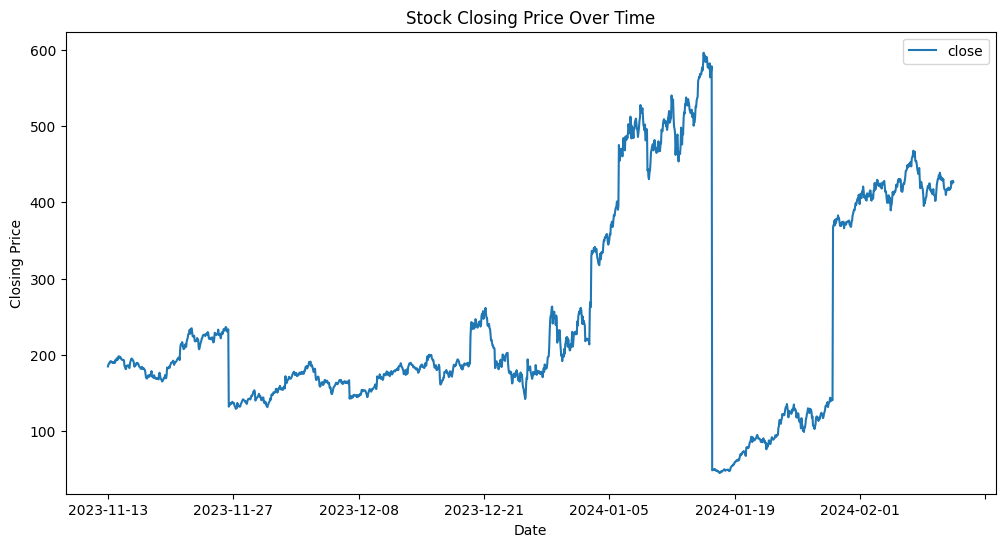

In [42]:
# Plot a graph to visualize the stock price over time
df_price.plot(x='date', y='close', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')

From November 2023 to early January 2024, the stock price rises strongly, peaking near 590. Then, there is a sharp drop in mid-January, followed by sudden jumps (gaps) later in the month. Since early February, the price has moved more steadily in the 400–450 range. Te chart shows strong growth at first, a massive drop, high volatility, and sharp movements that may need further review.

In [43]:
# Calculate daily returns based on closing prices
df_price['return'] = df_price['close'].pct_change()

df_price = df_price.dropna(subset=['return'])
df_price.head(3)


,date,ticker,open,high,low,close,volume,return
1,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400,0.014286
2,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500,0.003041
3,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900,0.009042


Text(0.5, 1.0, 'Distribution of Daily Returns')

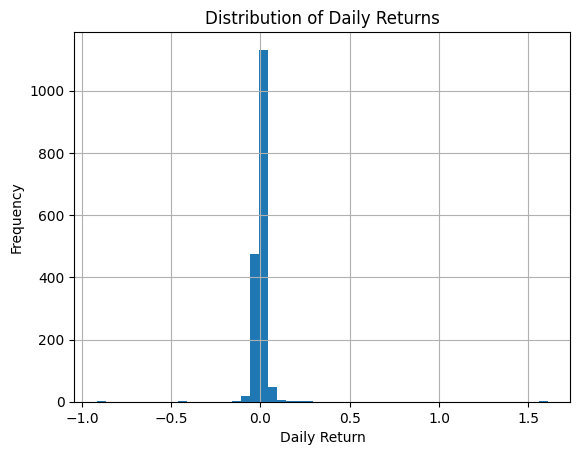

In [44]:
# Plot the distribution of daily returns
df_price['return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')

The histogram shows that most daily returns are very close to zero, meaning the stock usually moves only a small amount each day. The distribution is narrow and centered around zero, with very few extreme values on either side. This suggests that while there are occasional large moves, the majority of daily changes are small and stable.

#### News CSV

In [45]:
# Read news data from the CSV file
df_news = pd.read_csv('data/news.csv')
df_news.head()

,datetime,ticker,headline,summary
0,2024-10-29 18:07:48,AAPL,Apple Unveils the Redesigned Mac Mini,-- Apple overhauled the design of its Mac mini...
1,2024-10-29 02:21:10,AAPL,Apple blocked from selling iPhone 16 in Indone...,TECH giant Apple will not be allowed to sell i...
2,2024-10-28 14:05:22,AAPL,"Apple Rises on Apple Intelligence Rollout, New...",-- Apple unveiled its new iMac and said Apple ...
3,2024-10-28 12:05:04,AAPL,Apple : How Apple developed the world’s first ...,apple stories Inside the Audio Lab: How Apple ...
4,2024-10-28 11:02:06,AAPL,Apple launches the iPhone into the AI era with...,Apple is releasing a free software update that...


In [46]:
# Get data types of the news df. All are in object, or strings 
df_news.dtypes

datetime    object
ticker      object
headline    object
summary     object
dtype: object

In [47]:
# Show summary statistics for the news dataframe
df_news.describe()

,datetime,ticker,headline,summary
count,4440,4440,4440,4439
unique,4395,7,4214,4262
top,2024-06-24 03:40:00,AMZN,European regulators crack down on Big Tech,Editor's note: This post is part of the AI Dec...
freq,4,941,8,6


In [48]:
# Check for duplicates. There are some duplicates in the news data.
df_news.duplicated().any()

# Display the duplicated rows
df_news[df_news.duplicated()]

# Remove duplicates from the news data
df_news = df_news.drop_duplicates()

#### Combine Datasets

In [49]:
# Convert date columns to datetime
df_price['date'] = pd.to_datetime(df_price['date']).dt.date
df_news['date'] = pd.to_datetime(df_news['datetime']).dt.date

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_21356\2600075466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['date'] = pd.to_datetime(df_price['date']).dt.date


In [50]:
# Add news count per day to the news dataframe
news_agg = df_news.groupby('date').size().reset_index(name='news_count')

In [ ]:
# Combine prices and news data on the 'date' column
df_final = pd.merge(df_price, news_agg, on='date', how='left')

# Fill NaN values in 'news_count' with 0 (days with no news)
df_final['news_count'] = df_final['news_count'].fillna(0).astype(int)

In [52]:
df_final.head(10)

,date,ticker,open,high,low,close,volume,return,news_count
0,2023-11-14,AAPL,187.699997,188.110001,186.300003,187.440002,60108400,0.014286,11
1,2023-11-15,AAPL,187.850006,189.500000,187.779999,188.009995,53790500,0.003041,4
2,2023-11-16,AAPL,189.570007,190.960007,188.649994,189.710007,54412900,0.009042,26
3,2023-11-17,AAPL,190.250000,190.380005,188.570007,189.690002,50922700,-0.000105,13
4,2023-11-20,AAPL,189.889999,191.910004,189.880005,191.449997,46505100,0.009278,4
5,2023-11-21,AAPL,191.410004,191.520004,189.740005,190.639999,38134500,-0.004231,10
6,2023-11-22,AAPL,191.490005,192.929993,190.830002,191.309998,39617700,0.003514,23
7,2023-11-24,AAPL,190.869995,190.899994,189.250000,189.970001,24048300,-0.007004,8
8,2023-11-27,AAPL,189.919998,190.669998,188.899994,189.789993,40552600,-0.000948,16
9,2023-11-28,AAPL,189.779999,191.080002,189.399994,190.399994,38415400,0.003214,27


### Feature Engineering

In [53]:
# Display the top 10 dates with the highest news count
print(" ------------ News Count ------------")
df_final[['date', 'news_count']].head(10).sort_values(by='news_count', ascending=False)

 ------------ News Count ------------


,date,news_count
9,2023-11-28,27
2,2023-11-16,26
6,2023-11-22,23
8,2023-11-27,16
3,2023-11-17,13
0,2023-11-14,11
5,2023-11-21,10
7,2023-11-24,8
1,2023-11-15,4
4,2023-11-20,4


In [54]:
# Daily return (percentage change from previous day)
print("------------ Daily Return ------------")
df_final[['date', 'close', 'return']]

------------ Daily Return ------------


,date,close,return
0,2023-11-14,187.440002,0.014286
1,2023-11-15,188.009995,0.003041
2,2023-11-16,189.710007,0.009042
3,2023-11-17,189.690002,-0.000105
4,2023-11-20,191.449997,0.009278
...,...,...,...
1681,2024-10-22,427.510010,0.020846
1682,2024-10-23,424.600006,-0.006807
1683,2024-10-24,424.730011,0.000306
1684,2024-10-25,428.149994,0.008052


The daily return shows how much the closing price changes from one day to the next in percentage terms. Most changes are very small, close to zero, but sometimes there are bigger moves up or down. This feature helps to see how stable or volatile the stock is over time.

In [ ]:
# Calculate moving averages to capture short- and medium-term price trends
df_final['MA_3'] = df_final['close'].rolling(window=3).mean()   # 3-day moving average
df_final['MA_7'] = df_final['close'].rolling(window=7).mean()   # 7-day moving average

print("------------ Moving Averages ------------")
df_final[['date', 'close', 'MA_3', 'MA_7']].head(15)

------------ Moving Averages ------------


,date,close,MA_3,MA_7
0,2023-11-14,187.440002,NaN,NaN
1,2023-11-15,188.009995,NaN,NaN
2,2023-11-16,189.710007,188.386668,NaN
3,2023-11-17,189.690002,189.136668,NaN
4,2023-11-20,191.449997,190.283335,NaN
5,2023-11-21,190.639999,190.593333,NaN
6,2023-11-22,191.309998,191.133331,189.750000
7,2023-11-24,189.970001,190.639999,190.111428
8,2023-11-27,189.789993,190.356664,190.365714
9,2023-11-28,190.399994,190.053329,190.464284


The 3-day and 7-day moving averages capture short- and medium-term trends, respectively. MA_3 reacts quickly to price changes, while MA_7 smooths out fluctuations, showing that recent prices are generally trending upward with minor pullbacks.

In [ ]:
# Calculate 7-day rolling volatility (standard deviation of closing prices)
df_final['volatility_7'] = df_final['close'].rolling(window=7).std()

print(" ------------ Volatility ------------")
df_final[['date', 'close', 'volatility_7']].head(15)

 ------------ Volatility ------------


,date,close,volatility_7
0,2023-11-14,187.440002,NaN
1,2023-11-15,188.009995,NaN
2,2023-11-16,189.710007,NaN
3,2023-11-17,189.690002,NaN
4,2023-11-20,191.449997,NaN
5,2023-11-21,190.639999,NaN
6,2023-11-22,191.309998,1.553737
7,2023-11-24,189.970001,1.174910
8,2023-11-27,189.789993,0.765632
9,2023-11-28,190.399994,0.709503



The 7-day volatility peaks on November 22, 2023 (1.55) and December 5, 2023 (1.43), indicating strong short-term price fluctuations, while it remains lower and relatively stable between November 24 and December 4, 2023 (around 0.64–0.77), reflecting calmer periods.


In [57]:
# Create lag features (previous closing prices used as predictors)
df_final['lag_1'] = df_final['close'].shift(1)   # closing price from 1 day ago
df_final['lag_3'] = df_final['close'].shift(3)   # closing price from 3 days ago

print(" ------------ Lag Features ------------")
df_final[['date', 'close', 'lag_1', 'lag_3']].head(10)

 ------------ Lag Features ------------


,date,close,lag_1,lag_3
0,2023-11-14,187.440002,NaN,NaN
1,2023-11-15,188.009995,187.440002,NaN
2,2023-11-16,189.710007,188.009995,NaN
3,2023-11-17,189.690002,189.710007,187.440002
4,2023-11-20,191.449997,189.690002,188.009995
5,2023-11-21,190.639999,191.449997,189.710007
6,2023-11-22,191.309998,190.639999,189.690002
7,2023-11-24,189.970001,191.309998,191.449997
8,2023-11-27,189.789993,189.970001,190.639999
9,2023-11-28,190.399994,189.789993,191.309998


Lag features show the previous 1-day (Lag_1) and 3-day (Lag_3) closing prices, capturing short-term price memory. For example, on November 17, 2023, Lag_1 is 189.71 and Lag_3 is 187.44, reflecting recent momentum, while changes in Lag values indicate ongoing upward or downward trends.


### Modeling

In [58]:
# Predict next day's closing price
df_final['close_t_plus_1'] = df_final['close'].shift(-1)

# Drop last row since it has no target
df_final = df_final[:-1]

In [59]:
# Select features (price features + news_count)
features = ['close', 'return', 'MA_3', 'MA_7', 'volatility_7', 'lag_1', 'lag_3', 'news_count']
X = df_final[features]
y = df_final['close_t_plus_1']

In [60]:
# Split the dataset into training and test sets (80% train, 20% test, no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1348, 8)
Test set shape: (337, 8)


In [61]:
# Define baseline features (price-based indicators only)
baseline_features = ['close', 'return', 'MA_3', 'MA_7', 'volatility_7', 'lag_1', 'lag_3']

# Extract baseline features for training and test sets
X_train_baseline = X_train[baseline_features]
X_test_baseline = X_test[baseline_features]

### Linear Regression Model

In [62]:
# Drop rows with any NaN in features or target
train_df = pd.concat([X_train, y_train], axis=1).dropna()
X_train_clean = train_df[features]
y_train_clean = train_df['close_t_plus_1']

test_df = pd.concat([X_test, y_test], axis=1).dropna()
X_test_clean = test_df[features]
y_test_clean = test_df['close_t_plus_1']

In [63]:
# Train a baseline Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

# Predict on the clean test set
y_pred_baseline = lr_model.predict(X_test_clean)

# Evaluate model performance
rmse_baseline = np.sqrt(mean_squared_error(y_test_clean, y_pred_baseline))
mae_baseline = mean_absolute_error(y_test_clean, y_pred_baseline)

print("Baseline Linear Regression:")
print("RMSE:", round(rmse_baseline, 2))
print("MAE:", round(mae_baseline, 2))

Baseline Linear Regression:
RMSE: 13.42
MAE: 4.81


#### XGBoost Model

In [ ]:
# Define features for the model (including news-based feature)
improved_features = ['close', 'return', 'MA_3', 'MA_7', 'volatility_7', 'lag_1', 'lag_3', 'news_count']

# Prepare training and test sets with selected features
X_train_improved = X_train_clean[improved_features]
X_test_improved = X_test_clean[improved_features]
y_train_improved = y_train_clean
y_test_improved = y_test_clean

In [65]:
# Train an XGBoost regressor on the improved feature set
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_improved, y_train_improved)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_improved)

In [66]:

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test_improved, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_improved, y_pred_xgb)

# XGBOsst Results
print("XGBoost Regressor:")
print("RMSE:", round(rmse_xgb, 2))
print("MAE:", round(mae_xgb, 2))

# Compare Baseline vs Improved
print("\nPerformance Improvement:")
print("RMSE Improvement:", round(rmse_baseline - rmse_xgb, 2))
print("MAE Improvement:", round(mae_baseline - mae_xgb, 2))

XGBoost Regressor:
RMSE: 25.03
MAE: 17.61

Performance Improvement:
RMSE Improvement: -11.61
MAE Improvement: -12.8


The baseline Linear Regression **performs better** than the XGBoost model with added news_count feature. This suggests that for this dataset, the raw price-based features capture most of the predictive signal, while news_count may not add meaningful information for predicting next day closing price.

Although the linear model outperformed it in our results, I included XGBoost as a reference for a more robust non-linear model, which in other contexts can capture complex patterns between prices and news. 


### Results

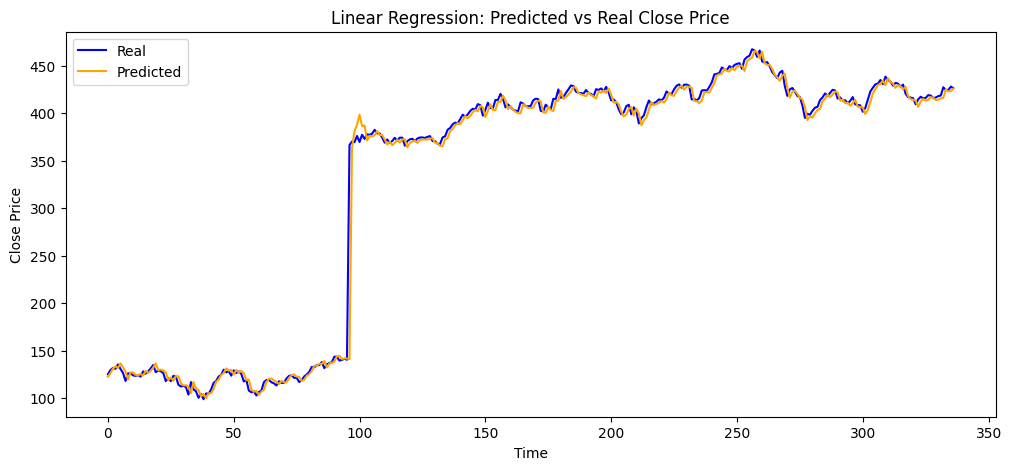

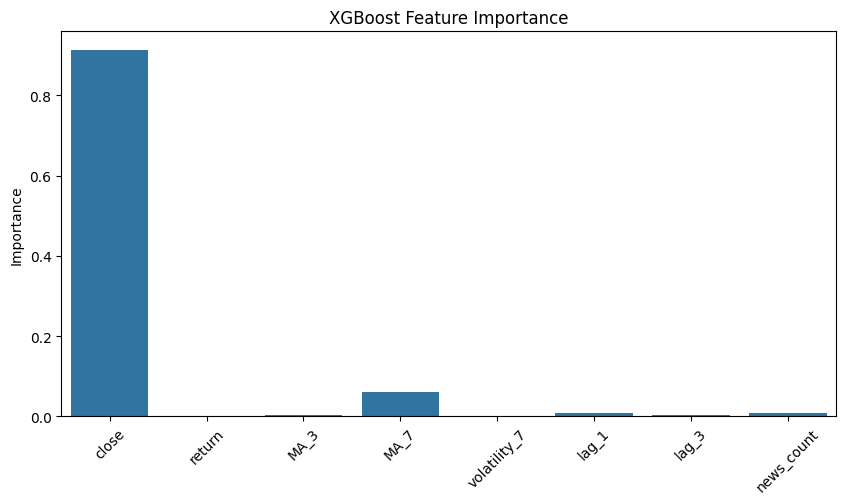

In [ ]:
# Predicted vs Real
plt.figure(figsize=(12,5))
plt.plot(y_test_clean.values, label='Real', color='blue')
plt.plot(y_pred_baseline, label='Predicted', color='orange')
plt.title('Linear Regression: Predicted vs Real Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Feature Importance (XGBoost
plt.figure(figsize=(10,5))
xgb_importance = xgb_model.feature_importances_
sns.barplot(x=improved_features, y=xgb_importance)
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

For the Linear Regression, the "Real" line (blue) represents the actual observed close prices in the dataset, while the "Predicted" line (orange) shows the estimations of the model I developed. Overall, the model appears to follow the general trend of the real prices, which means is a reasonable fit. Around the 100-time unit mark the model struggled to accurately predict a sudden, sharp change in price. However, the predictions generally align closely with the real values, especially during periods of more stable price movement.

In [68]:
results_df = pd.DataFrame({
    "Actual": y_test_clean,
    "Predicted": y_pred_baseline
})

# Calculate percentage error
results_df["% Error"] = ((results_df["Predicted"] - results_df["Actual"]) / results_df["Actual"]) * 100

# Show last 10 rows
results_sample = results_df.tail(10).round(2)
display(results_sample)

,Actual,Predicted,% Error
1675,418.74,417.16,-0.38
1676,416.12,416.32,0.05
1677,416.72,414.04,-0.64
1678,418.16,414.38,-0.90
1679,418.78,415.83,-0.70
1680,427.51,416.25,-2.63
1681,424.60,425.30,0.16
1682,424.73,423.07,-0.39
1683,428.15,423.58,-1.07
1684,426.59,426.13,-0.11


The model predictions are generally close to actual values, with errors mostly under 1% and only occasional deviations above 2%.